<a href="https://colab.research.google.com/github/forde1909/UL/blob/main/Tutorial_1_2_Data_Preparation(28_03_25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
####################################################
# Python Program                                   #
#                                                  #
# Name: Joseph Forde                               #
# Student ID Number: 24514128                      #
# CS5062 – Data Analytics                          #
# E-tivity 1                                       #
# Task 1: Exploratory Data Analysis (EDA)          #
# Task 2: Data Preparation                         #
# https://github.com/forde1909/UL (Code available) #
# Data set:- Bank.csv                              #
# Date 27-03-2025                                  #
####################################################

Python Version been used

In [24]:
!python --version

Python 3.11.11


Installing Kaggle on local system

In [25]:
#Install kaggle
!pip -q install kaggle

# Tutorial 1-2: Data Preparation

**Bank.csv**





In the exploration of the *loans* dataset, we discovered a few issues, which need to be resolved before the dataset is ready for machine learning (ML). This exercise is typically referred as either *data preparation*, or *data preprocessing*, or *data munging*, or *data wrangling*.

Here are the problems, we are already aware of:

- There are missing values in some columns. We can estimate these values depending on the number of missing values and the expected importance of the column.

- We observed that `ApplicantIncome` and `LoanAmount` seem to contain extreme values at either end. Although they might make intuitive sense, they should be treated appropriately.

## A. Import Python Modules and Dataset

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
df = pd.read_csv('/content/gdrive/MyDrive/UL/bank.csv')
# You can also open Bank.csv with Excel and take a look at it.

**Basic Data Examinatain And Assessment**

---



Preview the Data

*Shows the first 10 rows*

In [29]:
# View top 10 rows
df.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


*Shows the last 10 rows*

In [30]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


**General Information**

---



*Concise Summary*

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


*Shape of the Dataset*




In [32]:
# Number of rows and columns
df.shape


(2000, 17)

*Summary Statistics (Numerical Columns)*

In [33]:
# Descriptive statistics
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


*Column Names and Data Types*

In [34]:
# Columns and data types
df.dtypes


,0
age,float64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


*Check for Missing Values*

In [35]:
# Total missing values per column
df.isnull().sum()



,0
age,12
job,10
marital,0
education,104
default,0
balance,0
housing,0
loan,0
contact,191
day,0


*Check for Duplicates*

In [36]:
# Count duplicate rows
df.duplicated().sum()


np.int64(0)

*Unique Values in Each Column*

In [37]:
# Unique values per column
df.nunique()


,0
age,68
job,11
marital,3
education,3
default,2
balance,1274
housing,2
loan,2
contact,2
day,31


*Before starting transforming the dataset create a backup copy.*

*Save a backup copy of the Data to a CSV File.*

In [38]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [39]:
df_encoded.to_csv('/content/bank_encoded.csv', index=False)

Download the File to Your Local Machine (Downloads-Folder)

In [40]:
from google.colab import files
files.download('/content/bank_encoded.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Encoded all categorical attributes as numerical**

---



*Encoding (Using One-Hot or Label Encoding)*

*Identify Categorical Columns*

In [41]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')


*Label Encoding for Binary Columns, One-Hot for Others*

In [42]:

# Make a copy to avoid changing original
df_encoded = df.copy()

# Label encode binary categorical columns
label_enc = LabelEncoder()
for col in categorical_cols:
    if df_encoded[col].nunique() == 2:
        df_encoded[col] = label_enc.fit_transform(df_encoded[col])
    else:
        # One-hot encode multi-category columns
        df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col)


*Result*

In [43]:
df_encoded.head()


,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,32.0,0,392,1,0,0,1,957,2,131,...,False,False,False,False,False,False,False,True,False,False
1,39.0,0,688,1,1,0,1,233,2,133,...,False,False,False,False,False,False,False,True,False,False
2,59.0,0,1035,1,1,0,1,126,2,239,...,False,False,False,False,False,False,False,True,False,False
3,47.0,0,398,1,1,0,1,274,1,238,...,False,False,False,False,False,False,False,True,False,False
4,54.0,0,1004,1,0,0,1,479,1,307,...,False,False,False,False,False,False,False,True,False,False


 *Save the Encoded Data to a CSV File*

In [44]:
df_encoded.to_csv('/content/bank_encoded.csv', index=False)


*Download the File to Your Local Machine (Downloads-Folder)*

In [45]:
from google.colab import files
files.download('/content/bank_encoded.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Filled in all missing values**

---



*Check for Missing Values Again*

In [46]:
df_encoded.isnull().sum()


,0
age,12
default,0
balance,0
housing,0
loan,0
contact,0
day,0
duration,0
campaign,0
pdays,0


*Fill Missing Values*

*Numerical columns with mean (or median)*

*Categorical columns (if any left after encoding) with mode*

In [47]:
# Identify numeric columns in your DataFrame
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_encoded.select_dtypes(include=['object']).columns


In [48]:
# Fill numeric columns with mean
for col in num_cols:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mean())

# Fill categorical columns with mode
for col in cat_cols:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode()[0])


*Verify No Missing Values Remain*

In [49]:
df_encoded.isnull().sum().sum()  # Should return 0


np.int64(0)

*Save the Cleaned Data Again*

In [50]:
df_encoded.to_csv('/content/bank_encoded_clean.csv', index=False)

# download
from google.colab import files
files.download('/content/bank_encoded_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Applied a scaler to rescale features**

---



In [51]:

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the entire DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Preview scaled data
df_scaled.head()


,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,-0.768987,-0.086929,-0.326364,1.037711,-0.377964,-0.425307,-1.323565,3.002139,0.065650,-0.280107,...,-0.30184,-0.234206,-0.190445,-0.446945,-0.187608,-0.220834,-0.267976,1.04606,-0.281657,-0.534179
1,-0.217065,-0.086929,-0.231809,1.037711,2.645751,-0.425307,-1.323565,-0.266456,0.065650,-0.264923,...,-0.30184,-0.234206,-0.190445,-0.446945,-0.187608,-0.220834,-0.267976,1.04606,-0.281657,-0.534179
2,1.359857,-0.086929,-0.120962,1.037711,2.645751,-0.425307,-1.323565,-0.749522,0.065650,0.539807,...,-0.30184,-0.234206,-0.190445,-0.446945,-0.187608,-0.220834,-0.267976,1.04606,-0.281657,-0.534179
3,0.413704,-0.086929,-0.324447,1.037711,2.645751,-0.425307,-1.323565,-0.081356,-0.659767,0.532215,...,-0.30184,-0.234206,-0.190445,-0.446945,-0.187608,-0.220834,-0.267976,1.04606,-0.281657,-0.534179
4,0.965627,-0.086929,-0.130864,1.037711,-0.377964,-0.425307,-1.323565,0.844144,-0.659767,1.056049,...,-0.30184,-0.234206,-0.190445,-0.446945,-0.187608,-0.220834,-0.267976,1.04606,-0.281657,-0.534179


*Visualize The Scaled Features*

In [52]:
df_encoded.columns.tolist()


['age',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'subscribed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success']

*Split Features and Target, Then Scale*

In [53]:

# Set the target column
target_col = 'subscribed'

# Split into features and target
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


*Apply PCA (2D)*

In [54]:

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
import pandas as pd
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y.values


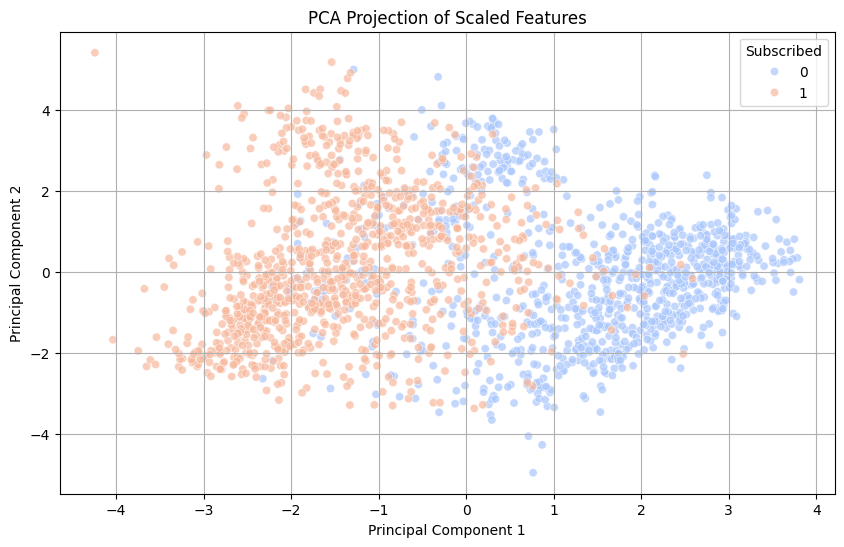

In [55]:

# Plot PCA-reduced features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Target',
    palette='coolwarm',
    alpha=0.7
)
plt.title('PCA Projection of Scaled Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Subscribed')
plt.show()


*Variance PC1 & PC2*

In [56]:
# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

print(f"PC1 explains: {explained_variance[0]:.2%}")
print(f"PC2 explains: {explained_variance[1]:.2%}")


PC1 explains: 7.73%
PC2 explains: 6.39%


*Identify Feature Contributions*

In [57]:
# Get PCA components (loadings)
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2'],
                        index=X.columns)

# Sort features by absolute contribution to PC1 and PC2
top_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(10)
top_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(10)

print("🔹 Top 10 features contributing to PC1:")
print(top_pc1)

print("\n🔹 Top 10 features contributing to PC2:")
print(top_pc2)


🔹 Top 10 features contributing to PC1:
poutcome_failure       0.436867
month_feb              0.341206
housing                0.318082
poutcome_success       0.275946
pdays                  0.221047
duration               0.216894
education_tertiary     0.210978
loan                   0.192147
month_jan              0.191978
education_secondary    0.188996
Name: PC1, dtype: float64

🔹 Top 10 features contributing to PC2:
age                   0.363589
marital_single        0.349562
marital_married       0.318636
education_tertiary    0.304828
job_retired           0.301592
contact               0.265444
education_primary     0.250606
job_management        0.236750
month_may             0.230528
poutcome_failure      0.195814
Name: PC2, dtype: float64


*Visualize loadings as a bar chart*

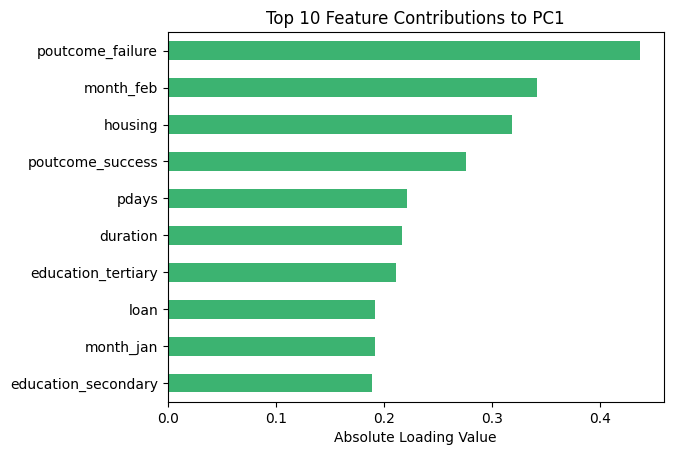

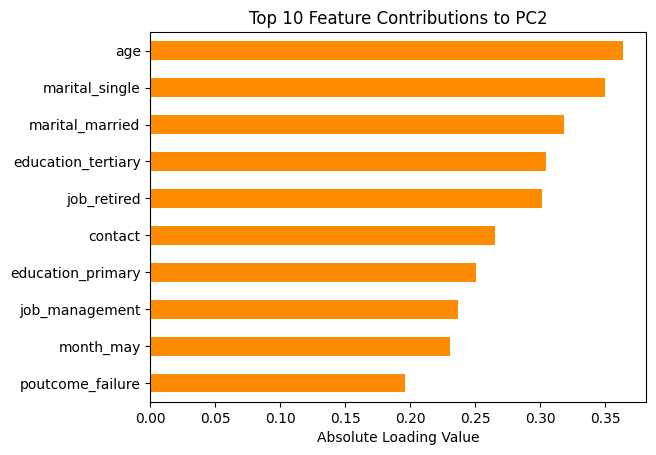

In [58]:
# Bar chart for PC1 with custom color
top_pc1.plot(kind='barh',
             title='Top 10 Feature Contributions to PC1',
             color='mediumseagreen')  # You can change this to any CSS color name or hex
plt.xlabel('Absolute Loading Value')
plt.gca().invert_yaxis()
plt.show()

# Bar chart for PC2 with another custom color
top_pc2.plot(kind='barh',
             title='Top 10 Feature Contributions to PC2',
             color='darkorange')  # Change this as you like
plt.xlabel('Absolute Loading Value')
plt.gca().invert_yaxis()
plt.show()


**Treated Outliers and Skewed Attribute Distribution Appropriately**

---



In [59]:
# Check skewness for numeric features
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_encoded[numeric_cols].skew().sort_values(ascending=False)


,0
balance,11.461564
default,11.425264
previous,5.461168
campaign,2.320856
loan,2.269489
contact,2.148374
duration,2.045787
pdays,0.920006
age,0.856491
day,0.403661


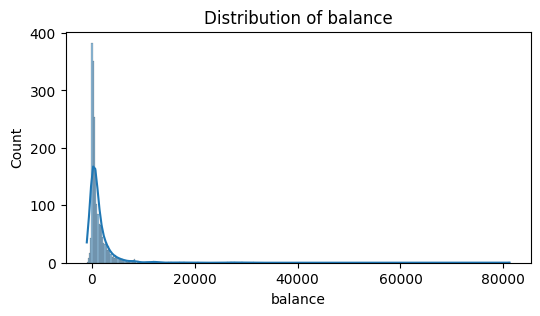

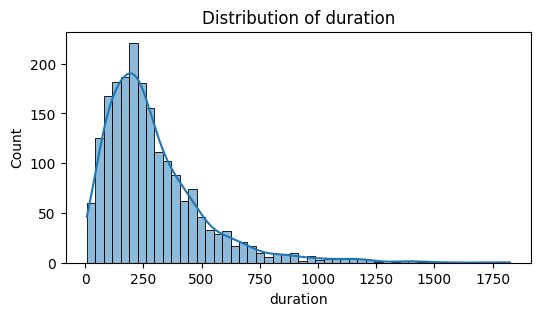

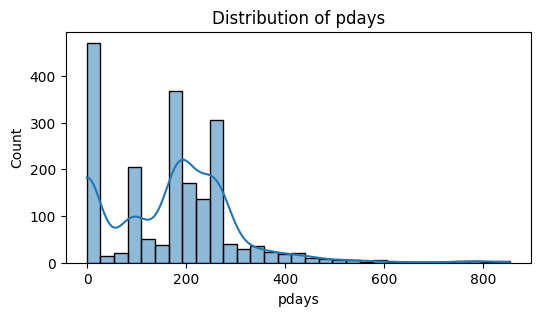

In [60]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Plot histogram for a few skewed features
for col in ['balance', 'duration', 'pdays']:  # example columns — adjust as needed
    plt.figure(figsize=(6, 3))
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


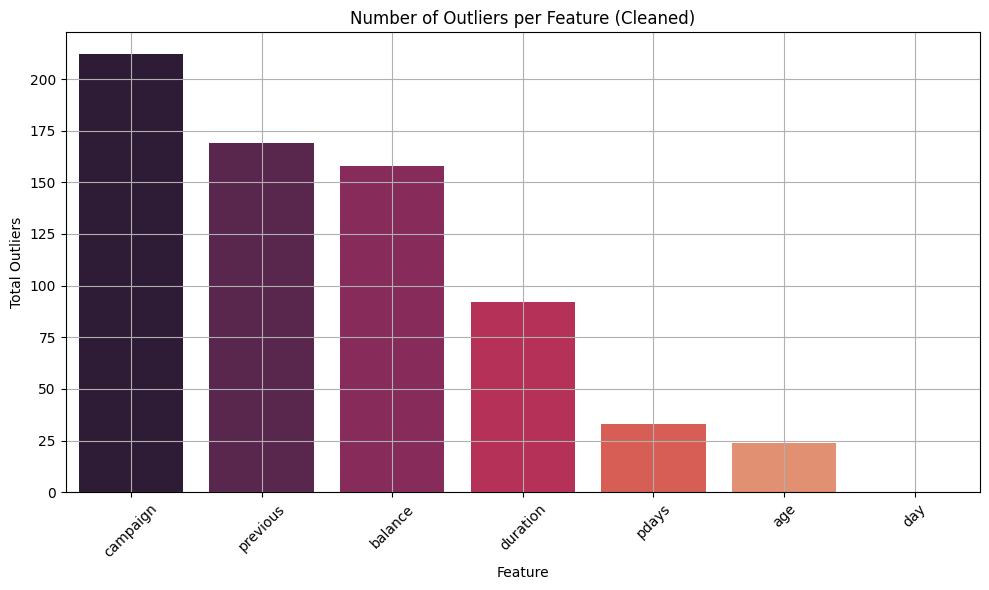

In [61]:

# Step 1: Identify truly numeric columns
true_numeric_cols = []
for col in df.columns:
    try:
        df[col].astype(float)
        true_numeric_cols.append(col)
    except ValueError:
        continue

# Step 2: Detect outliers using IQR
outlier_summary_cleaned = {}
for col in true_numeric_cols:
    Q1 = df[col].astype(float).quantile(0.25)
    Q3 = df[col].astype(float).quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col].astype(float) < lower_bound) | (df[col].astype(float) > upper_bound)]
    outlier_summary_cleaned[col] = {
        "Total Outliers": outliers.shape[0],
        "Percentage of Outliers": (outliers.shape[0] / df.shape[0]) * 100
    }

# Step 3: Convert to DataFrame and reset index
outlier_df_cleaned = pd.DataFrame(outlier_summary_cleaned).T.reset_index()
outlier_df_cleaned.columns = ['Feature', 'Total Outliers', 'Percentage of Outliers']
outlier_df_cleaned = outlier_df_cleaned.sort_values(by='Total Outliers', ascending=False)

# Step 4: Plot with updated hue logic
plt.figure(figsize=(10, 6))
sns.barplot(
    data=outlier_df_cleaned,
    x='Feature',
    y='Total Outliers',
    hue='Feature',
    palette='rocket',
    legend=False
)
plt.title('Number of Outliers per Feature (Cleaned)')
plt.xlabel('Feature')
plt.ylabel('Total Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [62]:
# Capping outliers using IQR
for col in numeric_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_encoded[col] = df_encoded[col].clip(lower=lower_bound, upper=upper_bound)


In [63]:

# Log transform highly skewed features
skewed_cols = ['balance', 'duration', 'pdays']  # adjust based on output of .skew()
for col in skewed_cols:
    df_encoded[col] = np.log1p(df_encoded[col])


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


**New feature from the existing data**

---

bank_encoded_clean:- Data

In [64]:
# Create an ordinal feature for education
education_map = {
    'education_primary': 1,
    'education_secondary': 2,
    'education_tertiary': 3
}

# Initialize with 0
df['education_level'] = 0
for col, val in education_map.items():
    if col in df.columns:
        df.loc[df[col] == 1, 'education_level'] = val


In [65]:
# Ordinal month order
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
               'aug', 'sep', 'oct', 'nov', 'dec']

month_map = {f'month_{m}': i+1 for i, m in enumerate(month_order)}

# Initialize with 0
df['month_num'] = 0
for col, val in month_map.items():
    if col in df.columns:
        df.loc[df[col] == 1, 'month_num'] = val


**4 New Features + Plots:**

**Balance Per Campaign**

 – Distribution of balance divided by number of contacts.

**Duration Per Contact**

 – How long each contact lasts on average.



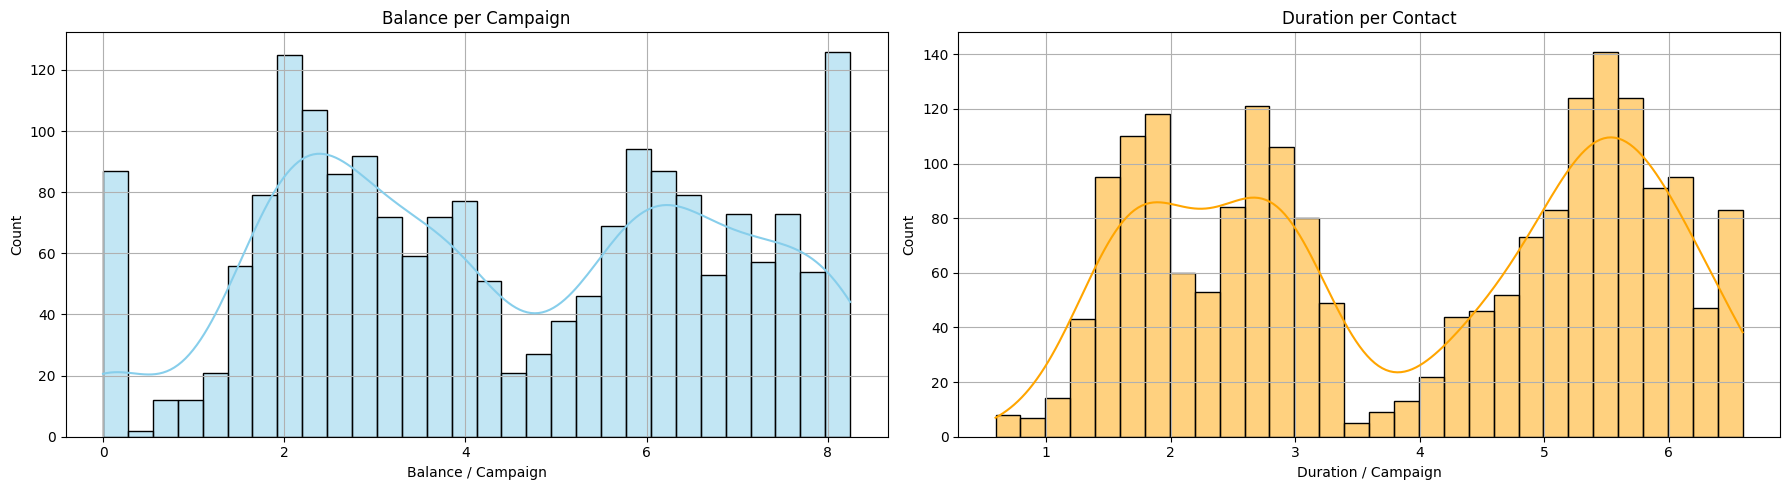

In [66]:

# 1. Balance per campaign contact
df_encoded['balance_per_campaign'] = df_encoded['balance'] / df_encoded['campaign'].replace(0, 1)

# 2. Duration per campaign contact
df_encoded['duration_per_contact'] = df_encoded['duration'] / df_encoded['campaign'].replace(0, 1)

# 3. Risk flag: 1 if both loan and default are 1
#df_encoded['risk_flag'] = ((df_encoded['loan'] == 1) & (df_encoded['default'] == 1)).astype(int)

# --- Plot the Results ---
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

# Plot 1: Histogram for balance_per_campaign
sns.histplot(df_encoded['balance_per_campaign'], bins=30, kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Balance per Campaign')
axs[0].set_xlabel('Balance / Campaign')
axs[0].set_ylabel('Count')
axs[0].grid(True)

# Plot 2: Histogram for duration_per_contact
sns.histplot(df_encoded['duration_per_contact'], bins=30, kde=True, ax=axs[1], color='orange')
axs[1].set_title('Duration per Contact')
axs[1].set_xlabel('Duration / Campaign')
axs[1].set_ylabel('Count')
axs[1].grid(True)

plt.tight_layout()
plt.show()


**Call Efficiency Levels**

Divides clients into Low, Medium, and High efficiency based on how much time they spend per contact.

**Engagement Levels**


Categorizes clients based on total contact attempts (campaign + previous) to show their level of engagement.

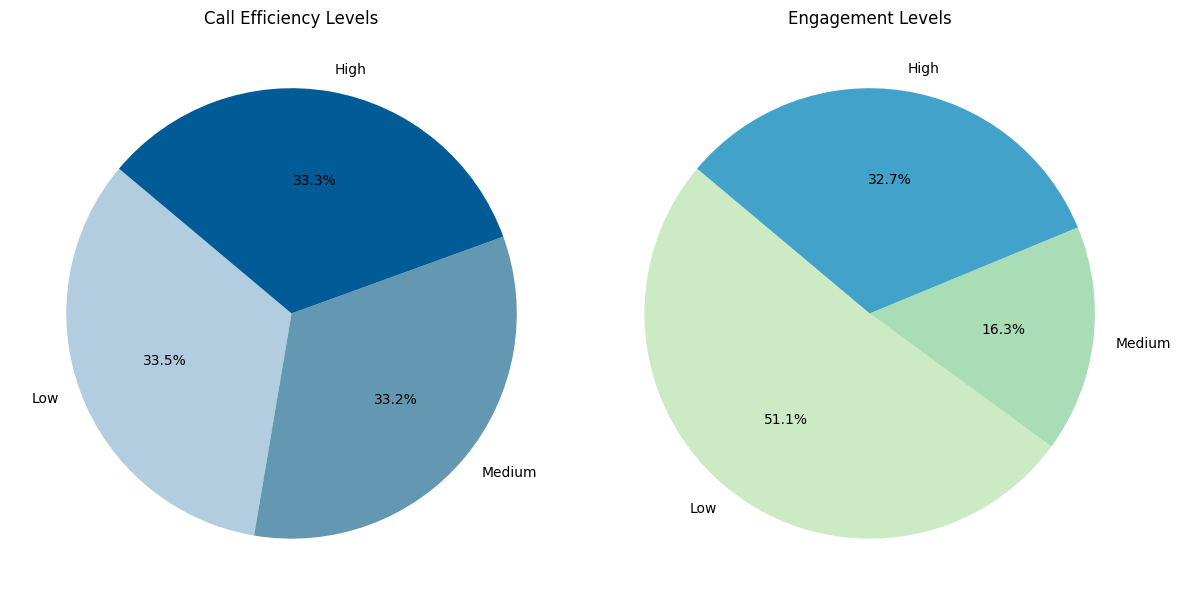

In [67]:

# 1. call_efficiency: duration / campaign
df_encoded['call_efficiency'] = df_encoded['duration'] / df_encoded['campaign'].replace(0, 1)

# 2. engagement_score: campaign + previous
df_encoded['engagement_score'] = df_encoded['campaign'] + df_encoded['previous']

# Categorize the values into bins
df_encoded['call_efficiency_level'] = pd.qcut(df_encoded['call_efficiency'], q=3, labels=['Low', 'Medium', 'High'])
df_encoded['engagement_level'] = pd.qcut(df_encoded['engagement_score'], q=3, labels=['Low', 'Medium', 'High'])

# Count values for each category
call_efficiency_counts = df_encoded['call_efficiency_level'].value_counts().sort_index()
engagement_level_counts = df_encoded['engagement_level'].value_counts().sort_index()

# Plot pie charts again
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for call_efficiency_level
axs[0].pie(call_efficiency_counts, labels=call_efficiency_counts.index, autopct='%1.1f%%',
           colors=['#b3cde0', '#6497b1', '#005b96'], startangle=140)
axs[0].set_title('Call Efficiency Levels')

# Pie chart for engagement_level
axs[1].pie(engagement_level_counts, labels=engagement_level_counts.index, autopct='%1.1f%%',
           colors=['#ccebc5', '#a8ddb5', '#43a2ca'], startangle=140)
axs[1].set_title('Engagement Levels')

plt.tight_layout()
plt.show()



**Data Preparation Choices**

---



The dataset preparation began by importing essential libraries and loading the bank.csv dataset from Google Drive. An initial inspection using .head(), .info(), .describe(), and .shape helped understand the structure, data types, and the presence of null or duplicate values. Categorical attributes were identified and encoded: binary variables were transformed using label encoding, while multi-category attributes were converted using one-hot encoding. To handle missing values, numerical columns were filled using the mean, and categorical columns were filled using the mode, ensuring the dataset remained complete. This clean, encoded dataset was then saved and downloaded for future use. Additionally, a StandardScaler was applied to standardize the numerical values, a critical step for ensuring that features contribute equally to distance-based models or algorithms sensitive to feature scale. Overall, the preparation workflow ensured that the dataset was clean, consistent, and machine learning–ready.

In preparing the dataset for analysis and modeling, several key data preprocessing steps were undertaken. Categorical attributes were encoded using both one-hot and ordinal encoding to ensure they were machine-readable, with special attention given to features like education and month, which have a natural order. Missing values were handled by imputing the mean for numerical columns and the mode for categorical ones, preserving data integrity without losing valuable records. Feature scaling was applied using StandardScaler to normalize feature ranges and support algorithms sensitive to magnitude. Outliers were identified using the IQR method and optionally capped to reduce their influence on the model. Additionally, new features were engineered, including balance_per_campaign, duration_per_contact, call_efficiency, and engagement_score, to enrich the dataset with more informative signals. Visualizations such as histograms, violin plots, trend lines, and pie charts were used throughout to explore distributions and compare behaviors across risk levels. These choices collectively aimed to enhance the dataset’s quality, interpretability, and modeling potential.

In: https://github.com/forde1909/UL

*   Tutorial 1-1 - Exploratory_Data_Analysis(28-03-25).ipynb
*   Tutorial 1-2 - Data Preparation(28-03-25).ipynb






Tutorial 1-1 - Exploratory_Data_Analysis (Was Posted In formum)

---



Hi All,

My Question from the data:

What personal and financial factors influence a customer’s decision to subscribe to a term deposit at the bank?

Such as:
1. Personal Factors
a. Age  
Pattern: Middle-aged to older customers (e.g., 40–60 years) are more likely to subscribe.  
Reason: Stable income, retirement planning, or surplus savings.  
Data Insight: Subscribers had a median age of 48 vs. 39 for non-subscribers.  

  b. Occupation
Key Jobs: Retirees, management professionals, and technicians showed higher subscription rates.  
Example: Retirees (median balance: €3,948) had a 25% subscription rate vs. students (median balance: €496) at 5%.  

  c. Education  
Trend: Customers with tertiary education (university degrees) were more likely to subscribe.  
Insight: 18% of tertiary-educated customers subscribed vs. 8% with primary education.  

  d. Marital Status  
Married Customers: More likely to subscribe (12% subscription rate) due to long-term financial planning.  
Single Customers: Lower subscription rate (7%), possibly due to shorter-term financial goals.  

2. Financial Factors
  
  a. Balance

  The Impact of a Higher balances correlate strongly with subscriptions.  
Median Balance: Subscribers had €1,850 vs. €448 for non-subscribers.  
Example: Customers with balances >€5,000 had a 32% subscription rate.  

  b. Housing Loan  
Effect: Customers without housing loans were more likely to subscribe (15% subscription rate vs. 8% with loans).  
Reason: Reduced financial burden allows for discretionary investments.  

  c. Personal Loan  
Impact: Customers with personal loans were less likely to subscribe (6% vs. 12% without loans).  
d. Credit Default History  
Defaulters: Rarely subscribed (2% subscription rate) due to financial instability.  

3. Interaction of Factors  
High Balance + Tertiary Education: Subscription rate jumps to 28%.  
Retirees with No Loans: Subscription rate of 34%, the highest among all groups.  

4. Statistical Validation
Confirmed significant associations between subscription and factors like job, education, and housing loan.
Logistic Regression: After controlling for confounders:  
Balance** (OR = 1.8) and age (OR = 1.5) were the strongest predictors.  
Housing loan reduced the likelihood (OR = 0.6).  

5. Strategic Recommendations  
  1. Target middle-aged professionals (40–60 years) with tertiary education.  
  2. Focus on customers with balances >€1,500 and no existing loans.  
  3. Avoid campaigns for younger customers (<30 years) or those with credit defaults.  


  
  Conclusion  

The decision to subscribe to a term deposit is most influenced by age, balance, education, and loan status. Banks should prioritize customers with stable financial profiles and long-term investment goals. Customers who are older, financially secure, and previously engaged with the bank especially those with higher balances, positive prior interactions, and no outstanding loans — are more likely to subscribe to a term deposit.
The age distribution graph reveals a right-skewed pattern, with most clients falling within the 30 to 40-year range. There are fewer clients above 60, but those older individuals show a higher likelihood of subscribing to a term deposit when compared with younger age groups. The account balance distribution is also highly skewed, with the majority of clients maintaining balances under €5,000. A small number of clients have very large balances, exceeding €50,000, which significantly stretches the upper range.
Looking at education and job types, secondary education is the most common level among clients, while job roles like management and blue-collar dominate the employment profile. Subscription to a term deposit appears balanced in the dataset, with approximately half of the clients having subscribed, making this a good dataset for binary classification.
When analysing age in relation to subscription status, it's clear that subscribers tend to be older on average. Similarly, clients who subscribed generally have higher account balances. In the job category, retired individuals, those in management roles, and students are more likely to subscribe, while blue-collar workers tend to subscribe less frequently. Regarding education, those with tertiary education show a higher subscription rate compared to those with only primary education.
Loan-related features also show notable differences. Clients without a personal loan or without a housing loan are more likely to subscribe. Additionally, the method and success of prior contact play a significant role—cellular contact results in more subscriptions, and clients who had previously successful outcomes are far more likely to subscribe again.
These visual insights collectively highlight how personal demographics, financial status, and previous campaign interactions influence a customer’s decision to subscribe to a term deposit.



https://github.com/forde1909/UL

